## Observations and Insights 

Pymaceuticals
Study conducted of 248 unique mice over 45 days tracking the effectiveness of 9 SCC treatments and one Placebo.
• The study was distributed between 51% male and 49% female mice.
• All treatments were measured at least 150 times through out this study.
• Capomulin, Ramicane, Infubinol, Ceftamin we drilled down on more.
• Capomulin and Ramicane appear to be more effective with in the study with lower Mean Tumor Volumes over the 45 days
• Subject weight has an impact on the effectiveness of Capomulin. There is a strong correclation factor of .84 when looking at  this weight to tumor volume relationship

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# view head for merge-merge on Mouse ID outer
#mouse_metadata.head()
#study_results.head()

# Combine the data into a single dataset
study_complete_data =  pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
# Display the data table for preview
study_complete_data.to_csv("data/study_complete_data.csv", index=False, header=True)
study_complete_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mice_df = study_complete_data[study_complete_data.duplicated(['Mouse ID', 'Timepoint'], keep = False)]
dupe_mice_df["Mouse ID"].unique()


array(['g989'], dtype=object)

In [3]:
# Checking the number of mice.
mouse_count = study_complete_data['Mouse ID'].nunique()
mouse_count

249

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_data =study_complete_data.drop(study_complete_data[study_complete_data['Mouse ID']=='g989'].index)
#len(mice_data)
mice_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = mice_data['Mouse ID'].nunique()
cleaned_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
#grouping data by regimen
regimen_stats = mice_data.groupby(['Drug Regimen'])
#regimen_stats.head()
# Calc mean
regimen_mean = regimen_stats['Tumor Volume (mm3)'].mean()
# calc median
regimen_median = regimen_stats['Tumor Volume (mm3)'].median()
# calc var
regimen_variance = regimen_stats['Tumor Volume (mm3)'].var()
# calc std dev
regimen_std_dev = regimen_stats['Tumor Volume (mm3)'].std()
# calc standard error of the mean (SEM)
regimen_sem = regimen_stats['Tumor Volume (mm3)'].sem()


# Assemble the resulting series into a single summary dataframe.
summary_stats_df = pd.DataFrame({'Tumor Volume (mm3) Mean' : regimen_mean,
                             'Tumor Volume (mm3) Median' : regimen_median,
                              'Tumor Volume (mm3 Var)' : regimen_variance,
                             'Tumor Volume (mm3) Std Dev' : regimen_std_dev,
                              'Tumor Volume (mm3) SEM' : regimen_sem
                              })

summary_stats_df.head()


,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3 Var),Tumor Volume (mm3) Std Dev,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
new_summary_df = mice_data.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean", "median","var", "std", "sem"]})
new_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

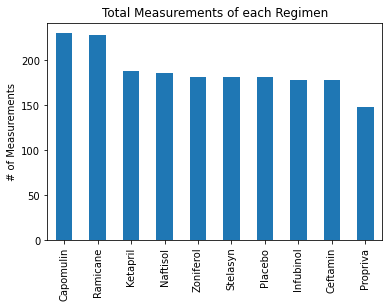

In [21]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#new df to create chart
regimen_df = mice_data['Drug Regimen'].value_counts()

#chart labels
plt.title('Total Measurements of each Regimen')
plt.ylabel('# of Measurements')
#create chart
regimen_df.plot(kind="bar")
plt.show()



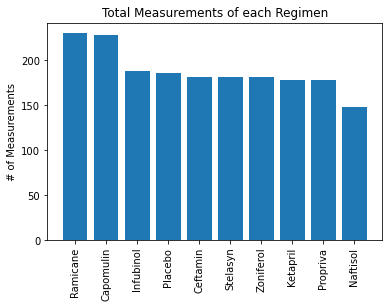

In [22]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
#create axis values
x_axis = mice_data['Drug Regimen'].unique()
y_axis = mice_data['Drug Regimen'].value_counts()


#chart labels
plt.title('Total Measurements of each Regimen')
plt.ylabel('# of Measurements')
plt.xticks(rotation='vertical')

#create chart 
plt.bar(x_axis, y_axis)
plt.show()

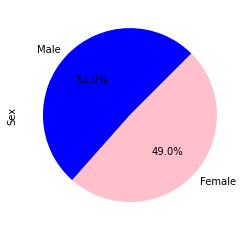

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#data to chart
pie_df = mice_data['Sex'].value_counts()
#pie_df.head()
#create chart
pie_df.plot(kind="pie", colors = ['blue','pink'],autopct="%1.1f%%", startangle = 45)
plt.show()

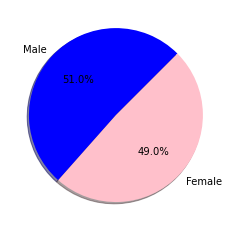

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#data to chart
gender = mice_data['Sex'].value_counts()
lables = ['Male', 'Female']
colors = ['blue', 'pink']
explode =(0,0)
plt.pie(gender, explode=explode, labels=lables, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=45)


plt.show()

## Quartiles, Outliers and Boxplots

ask to be sure you understand the use of reset_index. This is due to reducing the size of the df based on max timepoint. I had to reset to be able to merge.

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
grouped_data = mice_data.groupby(['Mouse ID'])['Timepoint'].max()
grouped_data = grouped_data.reset_index()
#grouped_data.head()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(grouped_data, mice_data, on=["Timepoint", "Mouse ID"], how='left')

final_tumor_volume_df.head()




,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume =[]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    df = final_tumor_volume_df.loc[final_tumor_volume_df['Drug Regimen'] == treatment , 'Tumor Volume (mm3)']
    tumor_volume.append(df)
    #setting and finding quartiles upper and lower 
    quartiles = df.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
 

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = (df.loc[(final_tumor_volume_df['Tumor Volume (mm3)']>= upper_bound) |
                      (final_tumor_volume_df['Tumor Volume (mm3)']<= lower_bound)])
    
    #print outliers    
    print (f'Outliers for {treatment} are {outliers}')
    #print bpunds
#     print(f"{treatment} \n Upper Bound {upper_bound} \n Lower Bound {lower_bound}")
#     print("----------------------------------------------------------")



Outliers for Capomulin are Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Ramicane are Series([], Name: Tumor Volume (mm3), dtype: float64)
Outliers for Infubinol are 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Outliers for Ceftamin are Series([], Name: Tumor Volume (mm3), dtype: float64)


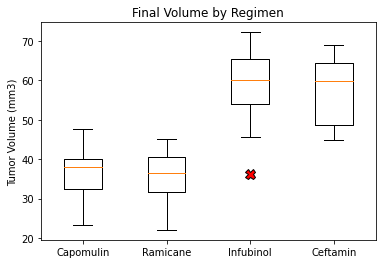

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#x axis labels
labels = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#outlier fromating
flierprops = dict(marker='X', markerfacecolor='r', markersize=10, markeredgecolor='black')

# Plot boxplot
plt.boxplot(tumor_volume, labels=labels, flierprops=flierprops)

plt.title('Final Volume by Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

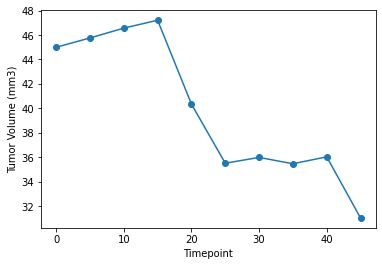

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#select mouse for review
id = "u364"
# selected mouse data from main data frame
mouse = mice_data.loc[mice_data['Mouse ID'] == id]
# plot 
line = plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker ='o')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()



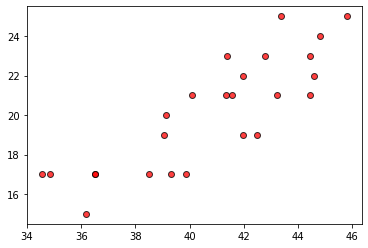

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#regimen for review
regimen = "Capomulin"
# create df for Capomulin grouping
regimen_df = mice_data.loc[mice_data['Drug Regimen'] == regimen]
#cacluate avg tumor vol by mouse id new df 
avg_tv = regimen_df.groupby('Mouse ID').agg({"Tumor Volume (mm3)":["mean"]})
# calculate avg weight by mouse id new df
avg_weight = regimen_df.groupby('Mouse ID').agg({"Weight (g)":["mean"]})

# merge 2 new dfs for plot df
merged_df = pd.merge(avg_tv, avg_weight, on= 'Mouse ID')


# create x values
x_axis = merged_df['Tumor Volume (mm3)']
# create y values
y_axis = merged_df['Weight (g)']
# create plot
plt.scatter(x_axis, y_axis,marker="o", facecolors="red", edgecolors="black",
             alpha=0.75)
plt.show()


## Correlation and Regression

The correlation between both factors is 0.84


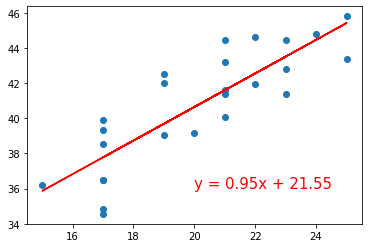

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
regimen = "Capomulin"
# create df for Capomulin grouping
regimen_df = mice_data.loc[mice_data['Drug Regimen'] == regimen]
# calculate avg tumor vol
avg_tv = regimen_df.groupby('Mouse ID').agg({"Tumor Volume (mm3)":["mean"]})
avg_tv
#calculate avg mouse weight
weight = regimen_df.groupby('Mouse ID').agg({"Weight (g)":["mean"]})
weight
# merge averge TV vol df with regimen df
merged_df = pd.merge(weight, avg_tv, on="Mouse ID")

merged_df

# correlation coefficient
tv = merged_df.iloc[:,1]
weight =merged_df.iloc[:,0]
correlation = st.pearsonr(tv,weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# add liner regression equatin and line to plot
x_values = weight
y_values = tv
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show()


